In [1]:
# Bagian 1: Import dan Konfigurasi
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [3]:
# Bagian 2: Preprocessing Data
data_dir = '../dataset/Uang Baru' # Sesuaikan path relative dari notebook
img_size = (224, 224)
batch_size = 32

In [4]:
# Pastikan direktori model ada
os.makedirs('../model', exist_ok=True)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 1028 images belonging to 7 classes.
Found 253 images belonging to 7 classes.


In [5]:
# Bagian 3: CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

f:\1204220073 KULIAH CHEASARIO YEHEZKIEL\1204220073_CHEASARIO TUGAS MATKUL SI\SEM VI\AI\tubess\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Bagian 4: Training
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint('../model/model.h5', save_best_only=True)
]

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=callbacks
)

f:\1204220073 KULIAH CHEASARIO YEHEZKIEL\1204220073_CHEASARIO TUGAS MATKUL SI\SEM VI\AI\tubess\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.1877 - loss: 4.5344

f:\1204220073 KULIAH CHEASARIO YEHEZKIEL\1204220073_CHEASARIO TUGAS MATKUL SI\SEM VI\AI\tubess\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 160s 5s/step - accuracy: 0.1887 - loss: 4.4867 - val_accuracy: 0.3518 - val_loss: 1.7210
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3209 - loss: 1.6790

33/33 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - accuracy: 0.3222 - loss: 1.6768 - val_accuracy: 0.5099 - val_loss: 1.2925
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4691 - loss: 1.3849

33/33 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.4706 - loss: 1.3824 - val_accuracy: 0.5217 - val_loss: 1.0637
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6858 - loss: 0.8798

33/33 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.6861 - loss: 0.8792 - val_accuracy: 0.7510 - val_loss: 0.7520
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7675 - loss: 0.6841

33/33 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.7679 - loss: 0.6838 - val_accuracy: 0.8340 - val_loss: 0.6811
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.8312 - loss: 0.5092 - val_accuracy: 0.7747 - val_loss: 0.6847
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.8007 - loss: 0.5950 - val_accuracy: 0.7194 - val_loss: 0.7264
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8665 - loss: 0.4396

33/33 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.8669 - loss: 0.4384 - val_accuracy: 0.8735 - val_loss: 0.5668
Epoch 9/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8865 - loss: 0.3116

33/33 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.8868 - loss: 0.3111 - val_accuracy: 0.9091 - val_loss: 0.4934
Epoch 10/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9228 - loss: 0.2639

33/33 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.9223 - loss: 0.2644 - val_accuracy: 0.9170 - val_loss: 0.3541
Epoch 11/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.9298 - loss: 0.2135 - val_accuracy: 0.8577 - val_loss: 0.5776
Epoch 12/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.9556 - loss: 0.1739 - val_accuracy: 0.9289 - val_loss: 0.4846
Epoch 13/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.9321 - loss: 0.2376 - val_accuracy: 0.8972 - val_loss: 0.5568
Epoch 14/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9050 - loss: 0.3691

33/33 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.9052 - loss: 0.3677 - val_accuracy: 0.8933 - val_loss: 0.3242
Epoch 15/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.9520 - loss: 0.1644 - val_accuracy: 0.9368 - val_loss: 0.4144
Epoch 16/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.9687 - loss: 0.1216 - val_accuracy: 0.9486 - val_loss: 0.3244
Epoch 17/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.9634 - loss: 0.1885 - val_accuracy: 0.9289 - val_loss: 0.3693
Epoch 18/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.9768 - loss: 0.0819 - val_accuracy: 0.9407 - val_loss: 0.4599
Epoch 19/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.9913 - loss: 0.0525 - val_accuracy: 0.9328 - val_loss: 0.4216


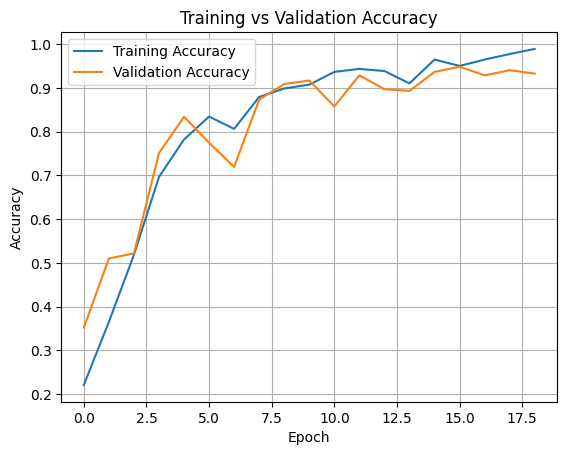

In [7]:
# Bagian 5: Visualisasi
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()